In [1]:
# what are the most important characters?
# how their importance evolves over time?
# main communities in this net?

import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# load spacy English language model
NER = spacy.load("en_core_web_sm")

In [4]:
!git clone https://github.com/thu-vu92/the_witcher_network.git

fatal: destination path 'the_witcher_network' already exists and is not an empty directory.


In [5]:
## Load books
import os

# Define the path to your cloned repository
dataset_path = 'the_witcher_network/data'

# Use a 'with' statement for efficient and safe resource management
with os.scandir(dataset_path) as entries:
    for entry in entries:
        # Check if the entry is a file or a directory
        if entry.is_file():
            print(f"File found: {entry.name}")
        elif entry.is_dir():
            print(f"Directory found: {entry.name}")

File found: 2 The Sword of Destiny.txt
File found: 3 Blood of Elves.txt
File found: 7 The Lady of the Lake.txt
File found: 1 The Last Wish.txt
File found: 6 The Tower of the Swallow.txt
File found: 8 something ends something begins.txt
File found: 4 Times of Contempt.txt
File found: 5 Baptism of Fire.txt


In [6]:
# Get all book files in the data directory
all_books = [b for b in os.scandir('the_witcher_network/data') if '.txt' in b.name]

In [7]:
all_books

[<DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>]

In [8]:
book = all_books[0]
book_text = open(book).read()
book_doc = NER(book_text)

In [9]:
# Visualize identified entities
displacy.render(book_doc[0:2000],style='ent')

In [10]:
# Read characters
character_df = pd.read_csv("the_witcher_network/characters.csv")


In [11]:
# Remove brackets and text within brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3326973469.py:3: SyntaxWarning: invalid escape sequence '\('
  character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))


In [12]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

In [13]:
# Get named entity list per sentence
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [14]:
sent_entity_df

sentence  \
0      (﻿The, Limits, of, the, Possible, \n, I, \n, "...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10     (", An, agreement, you, made, with, a, living,...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", At, least, we, 've, saved, some, coin, ,, ...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (well, it, \n, would, be, a, shame, if, they, ...   
18     (", Yes, ,, ", said, the, butcher, ,, ", It, '...   
19                           (Let, 's, take, a, look, .)   
20     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
21     (Do, n't, get, in, the, way, unless, you, want...   
22     (", A, fine, old, mare, ,, ", repeated, the, b...   
23      (", Leave, the, horse, alone, ,, my, darling, .)   
24                                               (", \n)   
25     (The, butcher, slowly, turned, around, towards...   
26     (The, stranger, had, thick, curly, brown, hair...   
27                         (He, had, no, weapons, ., \n)   
28     (3, \n, ", Step, away, from, the, horse, ,, ",...   
29                          (", What, have, we, here, ?)   
30     (A, horse, and, saddlebags, belonging, to, ano...   
31     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
32     (The, butcher, gave, a, nod, and, signalled, t...   
33     (Both, carried, heavy, clubs, ,, like, those, ...   
34     (", Who, are, you, ?, ", demanded, the, pimply...   
35     (", \n, ", You, carry, no, weapons, ., ", \n, ...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (", \n, The, butcher, also, drew, a, blade, ;,...   
38     (The, other, two, men, approached, ,, brandish...   
39     (", I, do, n't, carry, weapons, ,, ", responde...   
40     (", \n, From, behind, the, ruins, ,, two, youn...   
41     (The, crowd, quickly, parted, ,, retreated, th...   
42     (The, girls, smiled, ,, flashing, their, teeth...   
43     (They, had, blue, stripes, tattooed, from, the...   
44     (Lynx, pelt, clad, their, strong, muscles, fro...   
45     (From, behind, the, mail, -, clad, shoulder, o...   
46     (Pimply, got, down, on, one, knee, and, slowly...   
47     (From, the, hole, in, ruins, came, a, rumble, ...   
48     (Following, the, hands, ,, a, white, head, app...   
49               (A, murmur, escaped, the, crowd, ., \n)   
50     (The, alabaster, -, haired, man, straightened,...   
51     (Holding, the, beast, by, its, long, lizard, -...   
52     (The, burgrave, jumped, backwards, and, trippe...   
53     (Its, slashed, throat, ,, once, carmine, ,, wa...   
54              (Its, sunken, eyes, were, glassy, ., \n)   
55     (", Here, 's, the, basilisk, ,, ", said, the, ...   
56     (I, will, check, them, ,, I, 'm, warning, you, .)   
57     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
58     (The, white, -, haired, man, looked, around, a...   
59     (He, also, noticed, the, man, in, the, brown, ...   
60     (", It, 's, always, the, same, ,, ", he, said,...   
61     (You, people, never, change, ,, damn, you, to,...   
62     (", We, have, n't, touched, your, bags, ,, ", ...   
63     (The, men, armed, with, the, clubs, had, long,...   
64     (", Your, things, have, not, been, disturbed, ...   
65     (At, the, sight, of, his, smile, ,, which, blo...   
66     (", And, that, is, wh

In [15]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [16]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [17]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
94   (Is, there, anything, keeping, you, in, this, ...   
100  (It, would, be, an, honour, if, you, would, ac...   
104  (", \n, ", There, are, some, ,, ", Geralt, rep...   
108  (", \n, Geralt, took, off, a, glove, and, shoo...   
136  (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
147  (Geralt, loosened, his, belt, ,, removed, his,...   
152  (", Do, the, girls, speak, the, common, langua...   
155  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
162  (Yet, there, is, a, certain, principal, underl...   
189  (Let, 's, say, a, fierce, dragon, destroys, .....   

                     entities character_entities  
94          [Geralt of Rivia]  [Geralt of Rivia]  
100                  [Geralt]           [Geralt]  
104                  [Geralt]           [Geralt]  
108                  [Geralt]           [Geralt]  
136  [Three Jackdaws, Geralt]           [Geralt]  
147                  [Geralt]           [Geralt]  
152                  [Geralt]           [Geralt]  
155                  [Geralt]           [Geralt]  
162                  [Geralt]           [Geralt]  
189                  [Geralt]           [Geralt]

In [18]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                               for item in x])

/tmp/ipython-input-364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [19]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
94     (Is, there, anything, keeping, you, in, this, ...   
100    (It, would, be, an, honour, if, you, would, ac...   
104    (", \n, ", There, are, some, ,, ", Geralt, rep...   
108    (", \n, Geralt, took, off, a, glove, and, shoo...   
136    (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
...                                                  ...   
11031  (Yurga, did, n't, see, Geralt, 's, face, ,, hi...   
11032  (He, only, saw, black, -, gloved, hands, squee...   
11034                                 (Oh, ,, Geralt, !)   
11039                            (Say, it, ,, Geralt, !)   
11042  (", Forever, ,, Ciri, ., ", \n, ", It, 's, jus...   

                       entities character_entities  
94            [Geralt of Rivia]           [Geralt]  
100                    [Geralt]           [Geralt]  
104                    [Geralt]           [Geralt]  
108                    [Geralt]           [Geralt]  
136    [Three Jackdaws, Geralt]           [Geralt]  
...                         ...                ...  
11031           [Yurga, Geralt]    [Yurga, Geralt]  
11032                    [Ciri]             [Ciri]  
11034                  [Geralt]           [Geralt]  
11039                  [Geralt]           [Geralt]  
11042   [Forever, Ciri, Geralt]           [Geralt]  

[1621 rows x 3 columns]

In [20]:
## Create Relationships

window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i] != char_list[i-1]]

    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [21]:
relationship_df = pd.DataFrame(relationships)

In [22]:
pd.set_option('display.max_rows', None)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3              Niedamir             Geralt
4              Niedamir             Geralt
5                Geralt           Niedamir
6                Geralt           Niedamir
7              Niedamir             Geralt
8              Niedamir             Geralt
9              Niedamir             Geralt
10             Niedamir             Geralt
11               Geralt               Eyck
12               Geralt               Eyck
13               Geralt               Eyck
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18               Geralt               Eyck
19                 Eyck             Geralt
20               Geralt               Eyck
21               Geralt               Eyck
22             Niedamir             Geralt
23             Niedamir             Geralt
24             Niedamir             Geralt
25             Niedamir             Geralt
26             Niedamir             Geralt
27           Dorregaray             Geralt
28           Dorregaray             Geralt
29           Dorregaray             Geralt
30           Dorregaray             Geralt
31           Dorregaray             Geralt
32           Dorregaray             Geralt
33               Geralt         Dorregaray
34               Geralt         Dorregaray
35           Dorregaray           Yennefer
36             Yennefer         Dorregaray
37             Yennefer         Dorregaray
38             Yennefer         Dorregaray
39             Yennefer         Dorregaray
40             Yennefer         Dorregaray
41           Dorregaray             Geralt
42             Yennefer         Dorregaray
43           Dorregaray             Geralt
44               Boholt           Niedamir
45               Boholt           Niedamir
46               Boholt           Niedamir
47               Boholt           Niedamir
48               Boholt           Niedamir
49               Geralt             Yarpen
50               Geralt             Yarpen
51               Geralt             Yarpen
52         Gyllenstiern             Geralt
53         Gyllenstiern             Geralt
54         Gyllenstiern             Geralt
55         Gyllenstiern             Geralt
56               Geralt           Niedamir
57         Gyllenstiern             Geralt
58               Geralt           Niedamir
59         Gyllenstiern             Geralt
60               Geralt           Niedamir
61             Niedamir             Boholt
62               Boholt             Geralt
63               Boholt             Geralt
64               Geralt             Kennet
65               Geralt             Kennet
66               Kennet             Boholt
67               Kennet             Boholt
68               Kennet             Boholt
69               Kennet             Boholt
70               Boholt             Geralt
71               Geralt             Boholt
72               Boholt             Geralt
73               Geralt             Boholt
74               Boholt             Geralt
75               Boholt             Geralt
76               Boholt             Geralt
77               Boholt             Geralt
78               Boholt             Geralt
79               Geralt             Yarpen
80               Geralt             Yarpen
81               Geralt             Yarpen
82               Yarpen         Dorregaray
83               Yarpen         Dorregaray
84           Dorregaray           Yennefer
85               Yarpen         Dorregaray
86           Dorregaray           Yennefer
87               Yarpen         Dorregaray
88           Dorregaray           Yennefer
89           Dorregaray           Yennefer
90           Dorregaray           Yennefer
91             Yennefer           Niedamir
92             Nie

In [23]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                Geralt           Niedamir
8                Geralt           Niedamir
9                Geralt           Niedamir
10               Geralt           Niedamir
11                 Eyck             Geralt
12                 Eyck             Geralt
13                 Eyck             Geralt
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20                 Eyck             Geralt
21                 Eyck             Geralt
22               Geralt           Niedamir
23               Geralt           Niedamir
24               Geralt           Niedamir
25               Geralt           Niedamir
26               Geralt           Niedamir
27           Dorregaray             Geralt
28           Dorregaray             Geralt
29           Dorregaray             Geralt
30           Dorregaray             Geralt
31           Dorregaray             Geralt
32           Dorregaray             Geralt
33           Dorregaray             Geralt
34           Dorregaray             Geralt
35           Dorregaray           Yennefer
36           Dorregaray           Yennefer
37           Dorregaray           Yennefer
38           Dorregaray           Yennefer
39           Dorregaray           Yennefer
40           Dorregaray           Yennefer
41           Dorregaray             Geralt
42           Dorregaray           Yennefer
43           Dorregaray             Geralt
44               Boholt           Niedamir
45               Boholt           Niedamir
46               Boholt           Niedamir
47               Boholt           Niedamir
48               Boholt           Niedamir
49               Geralt             Yarpen
50               Geralt             Yarpen
51               Geralt             Yarpen
52               Geralt       Gyllenstiern
53               Geralt       Gyllenstiern
54               Geralt       Gyllenstiern
55               Geralt       Gyllenstiern
56               Geralt           Niedamir
57               Geralt       Gyllenstiern
58               Geralt           Niedamir
59               Geralt       Gyllenstiern
60               Geralt           Niedamir
61               Boholt           Niedamir
62               Boholt             Geralt
63               Boholt             Geralt
64               Geralt             Kennet
65               Geralt             Kennet
66               Boholt             Kennet
67               Boholt             Kennet
68               Boholt             Kennet
69               Boholt             Kennet
70               Boholt             Geralt
71               Boholt             Geralt
72               Boholt             Geralt
73               Boholt             Geralt
74               Boholt             Geralt
75               Boholt             Geralt
76               Boholt             Geralt
77               Boholt             Geralt
78               Boholt             Geralt
79               Geralt             Yarpen
80               Geralt             Yarpen
81               Geralt             Yarpen
82           Dorregaray             Yarpen
83           Dorregaray             Yarpen
84           Dorregaray           Yennefer
85           Dorregaray             Yarpen
86           Dorregaray           Yennefer
87           Dorregaray             Yarpen
88           Dorregaray           Yennefer
89           Dorregaray           Yennefer
90           Dorregaray           Yennefer
91             Niedamir           Yennefer
92         Gyllens

In [24]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [25]:
relationship_df.head(10)

source        target  value
0      Geralt      Niedamir     48
1        Eyck        Geralt     41
2  Dorregaray        Geralt     68
3  Dorregaray      Yennefer     97
4      Boholt      Niedamir     37
5      Geralt        Yarpen     23
6      Geralt  Gyllenstiern     35
7      Boholt        Geralt     80
8      Geralt        Kennet      2
9      Boholt        Kennet     12

In [26]:
## Graph analysis and visualization
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

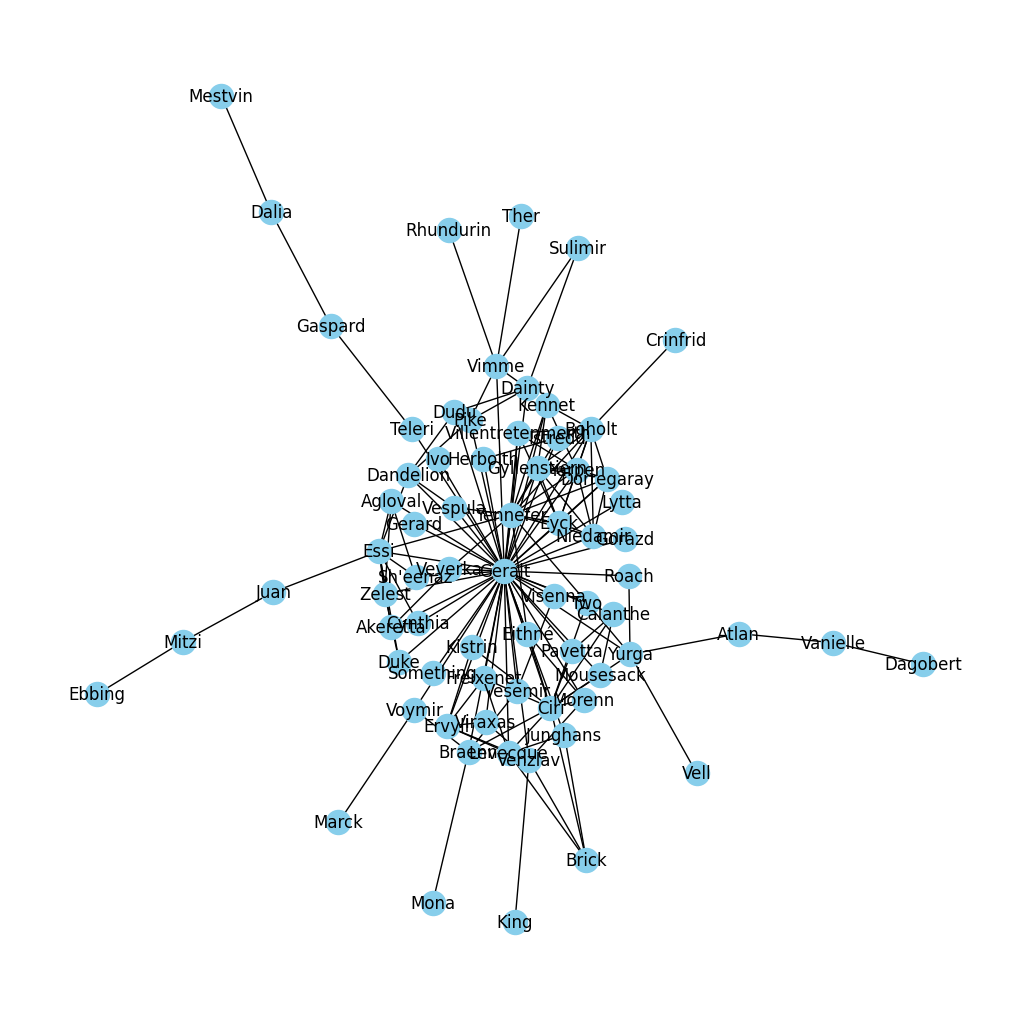

In [27]:
#### Graph visualization - Network
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [28]:
!pip install pyvis

In [29]:
#### Graph visualization - Pyvis
from pyvis.network import Network
from IPython.display import HTML, display

net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white',cdn_resources='in_line')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

display(HTML(filename="witcher.html"))

witcher.html


In [30]:
dict(G.degree)

{'Geralt': 51,
 'Niedamir': 7,
 'Eyck': 8,
 'Dorregaray': 7,
 'Yennefer': 15,
 'Boholt': 10,
 'Yarpen': 9,
 'Gyllenstiern': 8,
 'Kennet': 5,
 'Crinfrid': 1,
 'Villentretenmerth': 5,
 'Istredd': 3,
 'Herbolth': 2,
 'Ivo': 1,
 'Two': 4,
 'Vespula': 3,
 'Dainty': 5,
 'Dandelion': 5,
 'Pike': 4,
 'Vimme': 6,
 'Sulimir': 2,
 'Ther': 1,
 'Rhundurin': 1,
 'Dudu': 3,
 "Sh'eenaz": 3,
 'Agloval': 4,
 'Teleri': 2,
 'Gaspard': 2,
 'Dalia': 2,
 'Mestvin': 1,
 'Essi': 10,
 'Gerard': 1,
 'Zelest': 4,
 'Duke': 3,
 'Veverka': 3,
 'Akeretta': 3,
 'Something': 1,
 'Ebbing': 1,
 'Mitzi': 2,
 'Juan': 2,
 'Cynthia': 2,
 'Braenn': 5,
 'Ciri': 13,
 'Freixenet': 4,
 'Marck': 1,
 'Voymir': 3,
 'Kistrin': 3,
 'Vesemir': 3,
 'Ervyll': 6,
 'Eithné': 4,
 'Venzlav': 6,
 'Viraxas': 3,
 'Morenn': 4,
 'Mona': 1,
 'Pavetta': 3,
 'Brick': 4,
 'Junghans': 3,
 'Levecque': 6,
 'King': 1,
 'Mousesack': 3,
 'Calanthe': 4,
 'Yurga': 6,
 'Roach': 2,
 'Vell': 1,
 'Visenna': 2,
 'Atlan': 2,
 'Vanielle': 2,
 'Dagobert': 1,
 'Lytta

In [31]:
#### The most important characters in the Witcher
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7391304347826088,
 'Niedamir': 0.10144927536231885,
 'Eyck': 0.11594202898550725,
 'Dorregaray': 0.10144927536231885,
 'Yennefer': 0.21739130434782608,
 'Boholt': 0.14492753623188406,
 'Yarpen': 0.13043478260869565,
 'Gyllenstiern': 0.11594202898550725,
 'Kennet': 0.07246376811594203,
 'Crinfrid': 0.014492753623188406,
 'Villentretenmerth': 0.07246376811594203,
 'Istredd': 0.043478260869565216,
 'Herbolth': 0.028985507246376812,
 'Ivo': 0.014492753623188406,
 'Two': 0.057971014492753624,
 'Vespula': 0.043478260869565216,
 'Dainty': 0.07246376811594203,
 'Dandelion': 0.07246376811594203,
 'Pike': 0.057971014492753624,
 'Vimme': 0.08695652173913043,
 'Sulimir': 0.028985507246376812,
 'Ther': 0.014492753623188406,
 'Rhundurin': 0.014492753623188406,
 'Dudu': 0.043478260869565216,
 "Sh'eenaz": 0.043478260869565216,
 'Agloval': 0.057971014492753624,
 'Teleri': 0.028985507246376812,
 'Gaspard': 0.028985507246376812,
 'Dalia': 0.028985507246376812,
 'Mestvin': 0.01449275362318840

<Axes: >

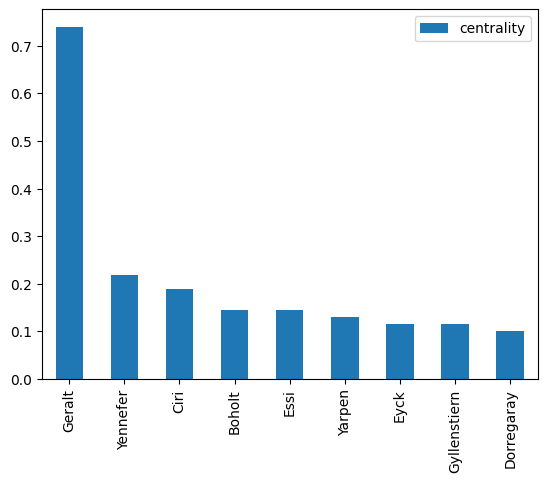

In [32]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

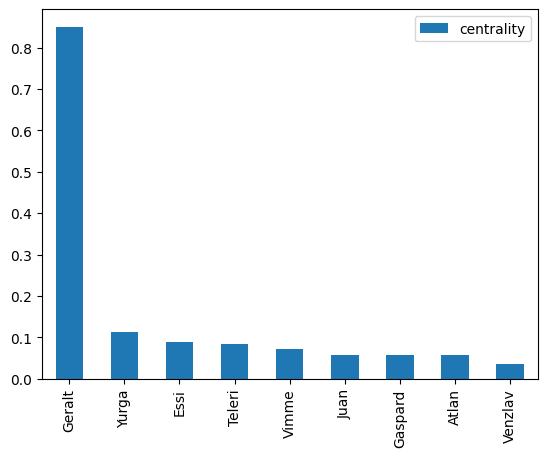

In [33]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

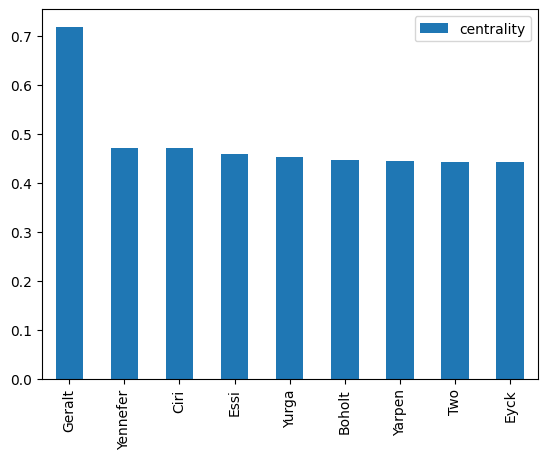

In [34]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [35]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [36]:
#### Community detection
import community as community_louvain

In [37]:
communities = community_louvain.best_partition(G)

In [38]:
communities

{'Geralt': 6,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Boholt': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 6,
 'Herbolth': 6,
 'Ivo': 6,
 'Two': 2,
 'Vespula': 3,
 'Dainty': 3,
 'Dandelion': 3,
 'Pike': 3,
 'Vimme': 3,
 'Sulimir': 3,
 'Ther': 3,
 'Rhundurin': 3,
 'Dudu': 3,
 "Sh'eenaz": 4,
 'Agloval': 4,
 'Teleri': 5,
 'Gaspard': 5,
 'Dalia': 5,
 'Mestvin': 5,
 'Essi': 4,
 'Gerard': 6,
 'Zelest': 4,
 'Duke': 4,
 'Veverka': 6,
 'Akeretta': 6,
 'Something': 6,
 'Ebbing': 4,
 'Mitzi': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Braenn': 6,
 'Ciri': 0,
 'Freixenet': 0,
 'Marck': 6,
 'Voymir': 6,
 'Kistrin': 0,
 'Vesemir': 6,
 'Ervyll': 0,
 'Eithné': 0,
 'Venzlav': 0,
 'Viraxas': 0,
 'Morenn': 0,
 'Mona': 6,
 'Pavetta': 6,
 'Brick': 0,
 'Junghans': 0,
 'Levecque': 0,
 'King': 0,
 'Mousesack': 6,
 'Calanthe': 6,
 'Yurga': 2,
 'Roach': 2,
 'Vell': 2,
 'Visenna': 6,
 'Atlan': 2,
 'Vanielle': 2,
 'Dagobert': 2,
 'Lytta': 6,

In [39]:
nx.set_node_attributes(G, communities, 'group')

In [40]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white',cdn_resources='in_line')
com_net.from_nx(G)
com_net.show("witcher_communities.html")
display(HTML(filename="witcher_communities.html"))

witcher_communities.html


In [41]:
## Evolution of characters' importance

In [43]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('the_witcher_network/data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [53]:
import sys
sys.path.append('/content/the_witcher_network')

from lib.utils.functions import *


In [57]:
import time

books_graph = []

# Loop through book list and create graphs
for i, book in enumerate(all_books):
    print(f"\n📖 Processing book {i+1}/{len(all_books)}: {book}")
    start = time.time()

    # --- Step 1: Read the text ---
    with open(book, "r", encoding="utf-8") as f:
        text = f.read()
    print(f"   ✅ Loaded book ({len(text)} characters)")

    # --- Step 2: Run NER ---
    t0 = time.time()
    book_text = NER(text)
    print(f"   ✅ NER done in {time.time() - t0:.2f}s")

    # --- Step 3: Entities per sentence ---
    t0 = time.time()
    sent_entity_df = get_ne_list_per_sentence(book_text)
    print(f"   ✅ Entity extraction done in {time.time() - t0:.2f}s")

    # --- Step 4: Filter to characters ---
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(
        lambda x: filter_entity(x, character_df)
    )
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0].copy()
    sent_entity_df_filtered.loc[:, 'character_entities'] = sent_entity_df_filtered['character_entities'].apply(
        lambda x: [item.split()[0] for item in x]
    )

    # --- Step 5: Create relationships ---
    t0 = time.time()
    relationship_df = create_relationships(df=sent_entity_df_filtered, window_size=5)
    print(f"   ✅ Relationship df created in {time.time() - t0:.2f}s")

    # --- Step 6: Graph construction ---
    t0 = time.time()
    G = nx.from_pandas_edgelist(
        relationship_df,
        source="source",
        target="target",
        edge_attr="value",
        create_using=nx.Graph()
    )
    books_graph.append(G)
    print(f"   ✅ Graph built in {time.time() - t0:.2f}s")

    print(f"🏁 Finished book {i+1} in {time.time() - start:.2f}s total")


📖 Processing book 1/8: <DirEntry '1 The Last Wish.txt'>
   ✅ Loaded book (497638 characters)
   ✅ NER done in 18.36s
   ✅ Entity extraction done in 44.19s
   ✅ Relationship df created in 0.90s
   ✅ Graph built in 0.00s
🏁 Finished book 1 in 63.88s total

📖 Processing book 2/8: <DirEntry '2 The Sword of Destiny.txt'>
   ✅ Loaded book (651692 characters)
   ✅ NER done in 23.68s
   ✅ Entity extraction done in 88.93s
   ✅ Relationship df created in 1.22s
   ✅ Graph built in 0.00s
🏁 Finished book 2 in 114.48s total

📖 Processing book 3/8: <DirEntry '3 Blood of Elves.txt'>
   ✅ Loaded book (603140 characters)
   ✅ NER done in 21.74s
   ✅ Entity extraction done in 78.30s
   ✅ Relationship df created in 1.19s
   ✅ Graph built in 0.00s
🏁 Finished book 3 in 102.34s total

📖 Processing book 4/8: <DirEntry '4 Times of Contempt.txt'>
   ✅ Loaded book (603128 characters)
   ✅ NER done in 20.94s
   ✅ Entity extraction done in 84.74s
   ✅ Relationship df created in 1.18s
   ✅ Graph built in 0.00s
🏁 Fi

<Axes: >

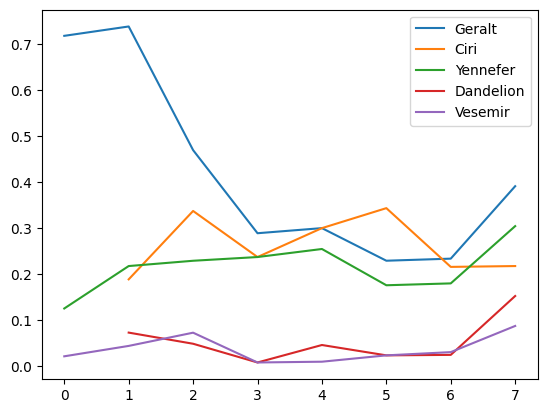

In [58]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()